# Pycairo practice

In [123]:
import cairo
import math
import numpy as np
from IPython.display import SVG, display  #for displaying in the jn, thanks Jake

## Web example

In [121]:
WIDTH, HEIGHT = 256, 256

surface = cairo.SVGSurface("example.svg", 256, 256)
ctx = cairo.Context (surface)

ctx.scale (WIDTH, HEIGHT) # Normalizing the canvas

pat = cairo.LinearGradient (0.0, 0.0, 0.0, 1.0)
pat.add_color_stop_rgba (1, 0.7, 0, 0, 0.5) # First stop, 50% opacity
pat.add_color_stop_rgba (0, 0.9, 0.7, 0.2, 1) # Last stop, 100% opacity

ctx.rectangle (0, 0, 1, 1) # Rectangle(x0, y0, x1, y1)
ctx.set_source (pat)
ctx.fill ()

ctx.translate (0.1, 0.1) # Changing the current transformation matrix

ctx.move_to (0, 0)
# Arc(cx, cy, radius, start_angle, stop_angle)
ctx.arc (0.2, 0.1, 0.1, -math.pi/2, 0)
ctx.line_to (0.5, 0.1) # Line to (x,y)
# Curve(x1, y1, x2, y2, x3, y3)
ctx.curve_to (0.5, 0.2, 0.5, 0.4, 0.2, 0.8)
ctx.close_path ()

ctx.set_source_rgb (0.3, 0.2, 0.5) # Solid color
ctx.set_line_width (0.02)
ctx.stroke ()

surface.finish()

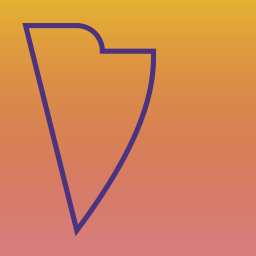

In [122]:
SVG('example.svg')

## Exon drawing

In [119]:
surface = cairo.SVGSurface("exon.svg", 300, 200)
context = cairo.Context(surface)
context.scale(400, 200)

x0, x1 = 0.1, 0.9
y0, y1 = 0.5, 0.5

context.move_to(x0, y0)
context.set_line_width(0.005)
context.line_to(x1, y1)
context.stroke()

context.rectangle(.2,(.5-.02), .2, .04)
context.fill()
context.stroke()

surface.finish()

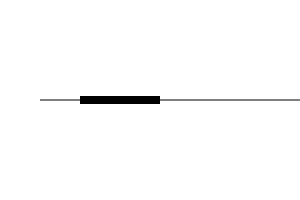

In [120]:
from IPython.display import SVG, display
SVG('exon.svg')

# Assignment

## Functions

In [127]:
def iupac_trans(motifs_file):
    '''IUPAC Translator: takes motif_list.txt, returns list of regex terms for the motif based on IUPAC nomenclature.'''
    
    iupac = {"A":'[Aa]', "a":'[Aa]',
             "C":'[Cc]', "c":'[Cc]',
             "G":'[Gg]', "g":'[Gg]',
             "T":'[TUtu]', "t":'[TUtu]',
             "U":'[TUtu]', "u":'[TUtu]',
             "R":'[AGag]', "r":'[AGag]',
             "Y":'[CTct]', "y":'[CTct]',
             "S":'[GCgc]', "s":'[GCgc]',
             "W":'[ATat]', "w":'[ATat]',
             "K":'[GTgt]', "k":'[GTgt]',
             "M":'[ACac]', "m":'[ACac]',
             "B":'[CGTcgt]', "b":'[CGTcgt]',
             "D":'[AGTagt]', "d":'[AGTagt]',
             "H":'[ACTact]', "h":'[ACTact]',
             "V":'[ACGacg]', "v":'[ACGacg]',
             "N":'[A-Za-z]', "n":'[A-Za-z]'}
                      
    
    with open(motifs_file, 'r') as motifs:
        search_terms = []  
        line = motifs.readline()  
        while line:  #each motif
            st = ''
            mt = str(line).strip('\n')
            for char in mt:  #each character
                st = st+iupac[char]  #find in iupac, add it to the current search term
            
            search_terms.append(st)
            line = motifs.readline()
    
    return search_terms

In [128]:
motifs = iupac_trans('motifs.txt')

motifs

['[CTct][Gg][Cc][CTct]',
 '[TUtu][Gg][Cc][Aa][TUtu][Gg]',
 '[Gg][Cc][Aa][TUtu][Gg]']